In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
student_df = pd.read_csv('..\\datasets\\student-mat.csv')
student_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
student_df.shape

(395, 33)

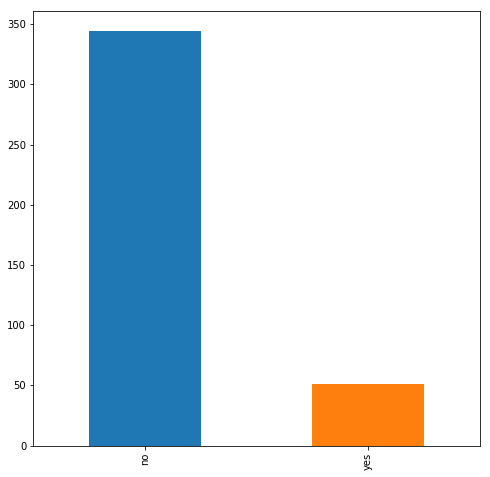

In [4]:
plt.figure(figsize=(8, 8))
pd.value_counts(student_df['schoolsup']).plot.bar()
plt.show()

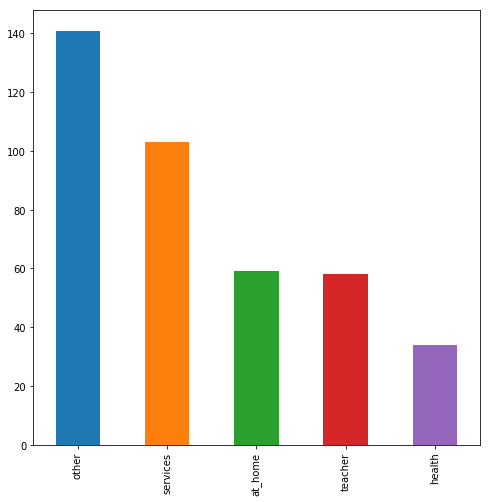

In [5]:
plt.figure(figsize=(8, 8))
pd.value_counts(student_df['Mjob']).plot.bar()
plt.show()

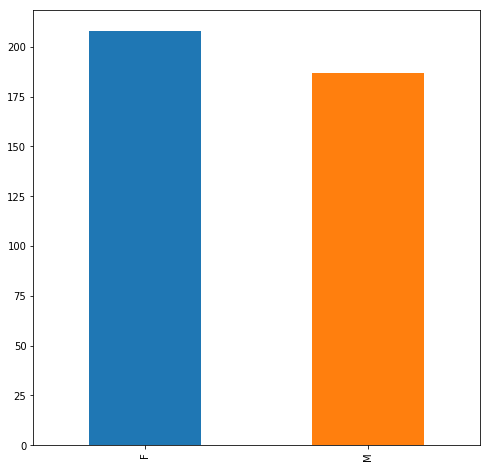

In [6]:
plt.figure(figsize=(8, 8))
pd.value_counts(student_df['sex']).plot.bar()
plt.show()

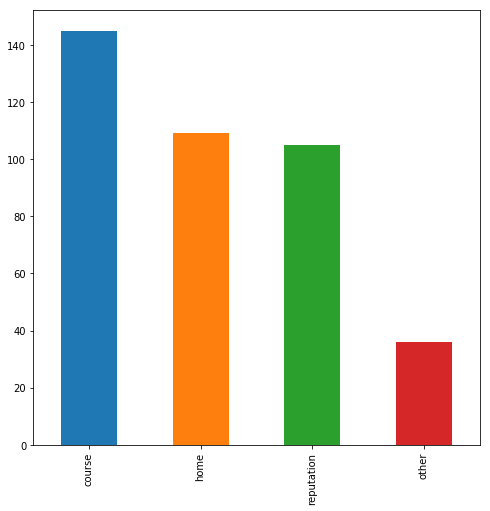

In [7]:
plt.figure(figsize=(8, 8))
pd.value_counts(student_df['reason']).plot.bar()
plt.show()

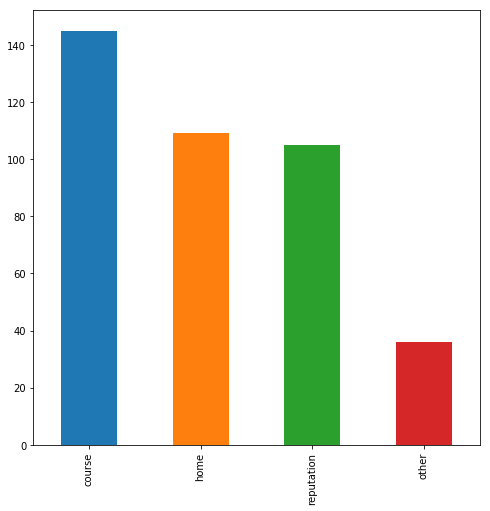

In [8]:
plt.figure(figsize=(8, 8))
pd.value_counts(student_df['reason']).plot.bar()
plt.show()

In [9]:
sex = ['M', 'F']

In [10]:
from sklearn import preprocessing
def encode_binary_columns(data, categories, columns):
    label_encoding = preprocessing.LabelEncoder()
    label_encoding = label_encoding.fit(categories)
    
    for column in columns:
        data[column] = label_encoding.transform(data[column].astype(str))

encode_binary_columns(student_df, sex, ['sex'])

In [11]:
student_df['sex'].sample(10)

110    1
238    0
61     0
337    0
206    0
136    1
359    0
26     1
179    1
120    0
Name: sex, dtype: int32

In [12]:
categories = ['yes', 'no']
column_list = ['schoolsup', 'famsup', 
               'paid', 'activities',
               'nursery', 'higher',
               'internet', 'romantic']

encode_binary_columns(student_df, categories, column_list)

In [13]:
student_df[column_list].sample(10)

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
256,0,1,1,1,1,1,1,0
383,0,0,0,0,1,1,0,0
87,0,1,0,1,1,1,1,0
301,0,0,1,0,1,1,1,0
224,0,1,0,1,0,1,1,0
250,0,0,0,0,1,0,1,0
212,1,1,1,0,1,1,1,0
118,0,1,0,1,1,1,1,0
208,0,1,1,0,1,1,0,0
246,0,0,0,0,1,1,1,0


In [14]:
famsize_category = ['GT3', 'LE3']
encode_binary_columns(student_df, famsize_category, ['famsize'])

In [15]:
student_df['famsize'].sample(10)

130    0
11     0
338    1
251    0
153    0
321    0
214    1
217    1
43     0
67     0
Name: famsize, dtype: int32

In [16]:
address_category = ['U', 'R']

In [17]:
encode_binary_columns(student_df, address_category, ['address'])

In [18]:
student_df['address'].sample(10)

247    1
289    1
278    1
297    1
180    1
131    1
142    1
386    0
240    1
238    0
Name: address, dtype: int32

In [19]:
one_hot_encoding = preprocessing.OneHotEncoder()
one_hot_encoding = one_hot_encoding.fit(student_df['guardian'].values.reshape(-1, 1))
one_hot_encoding.categories_

[array(['father', 'mother', 'other'], dtype=object)]

In [20]:
one_hot_labels = one_hot_encoding.transform(student_df['guardian'].values.reshape(-1, 1)).toarray()
one_hot_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [21]:
one_hot_labels[:,0]

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
labels_df = pd.DataFrame()

labels_df['guardian_father'] = one_hot_labels[:,0]
labels_df['guardian_mother'] = one_hot_labels[:,1]
labels_df['guardian_other'] = one_hot_labels[:,2]

labels_df.head(10)

,guardian_father,guardian_mother,guardian_other
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,1.0,0.0


In [23]:
encoded_df = pd.concat([student_df, labels_df], axis=1)
encoded_df.drop('guardian', axis=1, inplace=True)
encoded_df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,guardian_father,guardian_mother,guardian_other
144,GP,1,17,1,0,T,2,1,other,other,...,1,2,5,0,5,0,0,0.0,1.0,0.0
67,GP,0,16,1,0,T,3,1,services,other,...,1,2,5,4,7,7,6,0.0,1.0,0.0
211,GP,1,17,1,1,T,4,4,services,other,...,4,5,3,13,12,12,13,0.0,1.0,0.0
101,GP,1,16,1,0,T,4,4,services,teacher,...,1,1,4,0,16,17,17,1.0,0.0,0.0
210,GP,0,19,1,0,T,3,3,other,other,...,1,2,3,10,8,8,8,0.0,0.0,1.0
300,GP,0,18,1,1,A,4,4,health,other,...,1,1,4,14,12,10,11,0.0,1.0,0.0
289,GP,1,18,1,1,A,4,4,teacher,teacher,...,1,1,2,9,15,13,15,0.0,1.0,0.0
351,MS,1,17,1,0,T,3,3,health,other,...,2,3,3,2,13,13,13,0.0,1.0,0.0
270,GP,0,19,1,0,T,3,3,other,services,...,3,3,5,15,9,9,9,0.0,0.0,1.0
9,GP,1,15,1,0,T,3,4,other,other,...,1,1,5,0,14,15,15,0.0,1.0,0.0


In [40]:
student_df = pd.get_dummies(student_df)

In [29]:
student_df.loc[:,'Mjob_other':].head(10)

In [ ]:
student_df.to_csv('student_mat_processed01.csv', index=False)